In [3]:
!pip install numpy matplotlib scipy scikit-learn



C:\Users\billa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


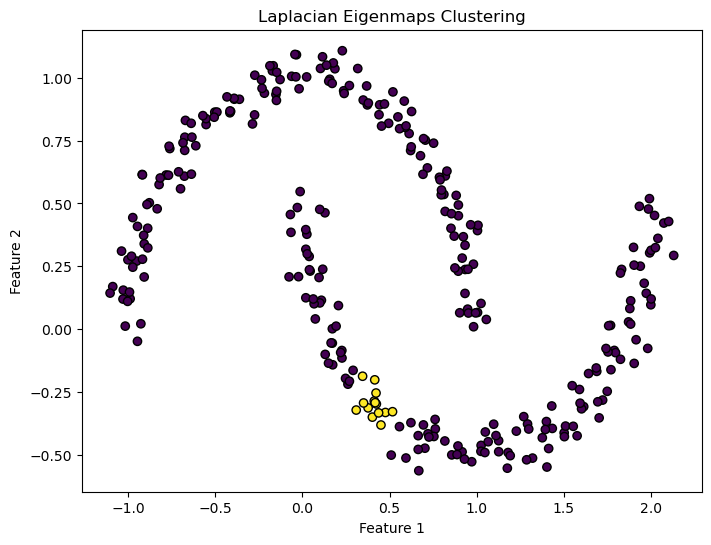

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from sklearn.cluster import KMeans

# Step 1: Generate a synthetic dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=42)

# Step 2: Create a k-nearest neighbors graph (affinity matrix)
k = 10
knn_graph = kneighbors_graph(X, n_neighbors=k, mode='connectivity')
W = knn_graph.toarray()  # Convert sparse graph to a dense adjacency matrix

# Step 3: Compute the degree matrix
D = np.diag(W.sum(axis=1))

# Step 4: Compute the unnormalized graph Laplacian
L = D - W

# Step 5: Compute the eigenvectors of the Laplacian
eigenvalues, eigenvectors = np.linalg.eigh(L)

# Step 6: Select the eigenvectors corresponding to the smallest non-zero eigenvalues
num_clusters = 2
embedding = eigenvectors[:, 1:num_clusters + 1]  # Skip the first eigenvector (constant)

# Step 7: Cluster the data in the lower-dimensional space using k-means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(embedding)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('Laplacian Eigenmaps Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
